## Influence line

The influence line is a continuous function $\mathcal{H}(x)$ defined on the interval $[0,L]$, where $L$ is the length (in meters) of the influence line. In practice, this function is sampled with with a period $\delta_L$ (in meters), and it is numerically represented by a vector

$$
{\bf h} = \big[\mathcal{H}(n \delta_L)\big]_{n\in\{0,1,\dots,L/\delta_L\}}.
$$

For example, the choice $L=30$ and $\delta_L = 0.1$ leads to an influence line represented by a vector of size $300$.

## Observed signal

The load of a bridge passing vehicle generates a strain information represented by a continuous function $\mathcal{Y}(x)$ definend on the interval $[0,L_{\rm bridge}]$, where $L_{\rm bridge} \ge L$ is the length (in meters) of the bridge. In practice, a system installed underneath the bridge measures this function with a sampling period $\delta_T$ (in seconds). The observed measurements depend on the (longitidinal) speed $\mathcal{V}(t)$ of the passing vehicle, because the spatial domain $[0,L_{\rm bridge}]$ is sampled according to the relationsphip $x = t \, \mathcal{V}(t)$. By assuming a constant speed $\bar{v}$ throughout the bridge, the measurements are represented by a vector

$$
{\bf y} = \big[\mathcal{Y}\big(n \delta_T \bar{v}\big)\big]_{n\in\{0,1,\dots,T_{\max}/\delta_T\}}.
$$

More generally, if the speed is not constant, the value $\bar{v}$ must be replaced by $\mathcal{V}(n \delta_T)$.

## Interpolation

To estimate the influence line from a (single) vehicle at a known (constant) speed $\bar{v}$, we can simply set $\delta_L = \bar{v} \delta_T$ and compute the vector ${\bf h}$ with the method of least squares. A more interesting task is to estimate both ${\bf h}$ and $v$. In this case, we set $\delta_L$ to an arbitrary small value, so that ${\bf h}$ has a fixed resolution, and we define the linearly interpolated value at $x'_n = n \delta_T v$ as

$$ \mathcal{H}(n \delta_T v) \approx h_{i_n} + (h_{i_n+1} - h_{i_n}) \Big(\frac{n \delta_T v - x_{i_n}}{x_{i_n+1} - x_{i_n}}\Big), $$

where $x_k = k \delta_L$, and $i_n$ is the index such that $x_{i_n} \le n \delta_T v < x_{i_n+1}$. Then, we can use the method of nonlinear least squares to compute both ${\bf h}$ and $v$.

In [1]:
def interpolate(meters, influence, speed, timestep):
    length = np.ceil(meters[-1] / (speed * timestep))
    target = speed * timestep * np.arange(length)           # n * delta_T * v
    indexs = np.searchsorted(meters, target, side='right')  # i_n + 1
    d_step = meters[1] - meters[0]                          # delta_L
    scales = target / d_step - (indexs-1)
    interpolated = influence[indexs-1] * (1-scales) + influence[indexs] * scales
    return interpolated

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

dstep = 0.1
meters = np.arange(0, 30+dstep, dstep)
influence = np.concatenate([np.linspace(0, 0.99, meters.size//2), [1], np.linspace(0.99, 0, meters.size//2)])

timestep = 0.05
speed = 22

new_influence = interpolate(meters, influence, speed, timestep)
new_meters = speed * timestep * np.arange(new_influence.size)

<IPython.core.display.Javascript object>


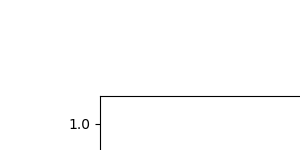

In [7]:
plt.figure()
plt.plot(meters, influence, label='influence')

plt.plot(new_meters, new_influence, '.', label='interpolated')

plt.show()